# RFM을 이용한 성장, 쇠퇴 서비스 업종 분류

1. 1차적으로 성장, 쇠퇴 산업을 구분하여 쇠퇴산업에 집중하여 분석을 실시.
- 성장, 쇠퇴 산업을 상위 15개로 한정
- RFM 지수를 이용한 산업 구분
- r: 분기를 나타냄(2016-1 = 1, ... 2021-2 = 22), f: 매출건수, m:매출액
    - 즉, RFM은 최근 데이터일수록 높은 값을 가지는 산업 구분 지표
    - r이 가중치 역할
    - 이를 통해 성장, 쇠퇴 산업을 구분
    
    
- R : 분기당 변동량(최근 지표까지 파악 가능) - 연도별, 분기별로 점수매겨 2021-2분기가 제일 높게
- F : 건수
- M : 매출액

In [88]:
# 라이브러리 임포트

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import font_manager, rc
font_path='C:\Windows\Fonts/malgun.ttf'
font=font_manager.FontProperties(fname=font_path).get_name() # 폰트 적용
rc('font',family=font)

# 데이터 로드

In [1]:
# 데이터 로드

s2021=pd.read_csv('../data/서울시2021.csv',encoding='utf-8')
s2020=pd.read_csv('../data/서울시2020.csv',encoding='utf-8')
s2019=pd.read_csv('../data/서울시2019.csv',encoding='utf-8')
s2018=pd.read_csv('../data/서울시2018.csv',encoding='utf-8')
s2017=pd.read_csv('../data/서울시2017.csv',encoding='utf-8')
s2016=pd.read_csv('../data/서울시2016.csv',encoding='utf-8')

In [2]:
# 데이터 병합

s_merged = pd.concat([s2021, s2020, s2019, s2018, s2017, s2016], axis=0)
s_merged.shape

(828487, 80)

In [6]:
df = s_merged.groupby(by='기준_년_코드').mean()

<AxesSubplot:xlabel='기준_년_코드', ylabel='연령대_30_매출_비율'>

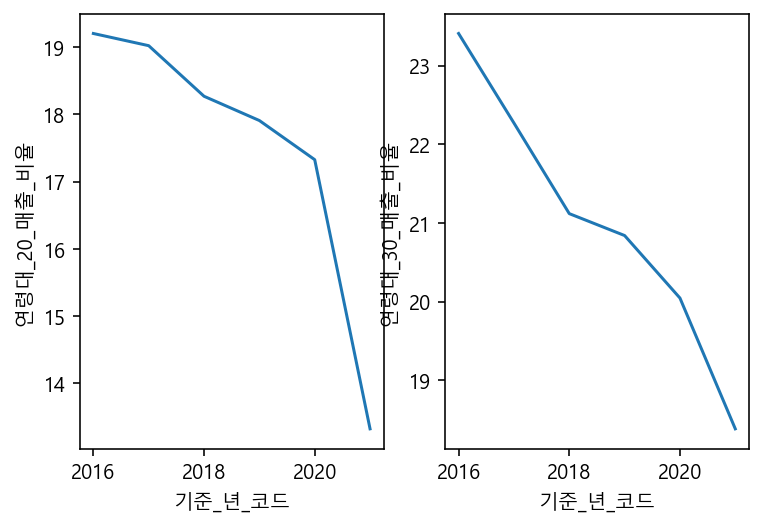

In [9]:
plt.subplot(121)
sns.lineplot(data=df, x='기준_년_코드', y='연령대_20_매출_비율')
plt.subplot(122)
sns.lineplot(data=df, x='기준_년_코드', y='연령대_30_매출_비율')

In [4]:
# 데이터 예시

s_merged.head(1)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2021,2,U,관광특구,1001496,강남 마이스 관광특구,CS300043,전자상거래업,5836078.0,92,...,0,14,74,0,27,42,5,5,9,8


# RFM 지표 생성

## M지표 이용 매출액 분류

- 매출액 데이터들을 합하여 M지표로 계산

- 매출금액/(매출건수*점포수)

In [124]:
s_merged['M지표']=s_merged['분기당_매출_금액']/(s_merged['분기당_매출_건수']*s_merged['점포수'])

 # 숫자간 격차가 너무 커서 log1p사용
s_merged['M지표']=np.log1p(s_merged['M지표'])
s_merged.head(2)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,M지표
0,2021,2,U,관광특구,1001496,강남 마이스 관광특구,CS300043,전자상거래업,5836078.0,92,...,14,74,0,27,42,5,5,9,8,8.978466
1,2021,2,U,관광특구,1001496,강남 마이스 관광특구,CS300035,인테리어,86120359.0,739,...,370,0,0,0,0,370,0,0,4,10.279698


## R 점수 계산

- EX) 2021년 2분기의 경우 6.25점으로
- 2016년부터 1.0, 1.25... 이렇게 시작
- 최근 데이터일수록 가중치를 주기 위함

In [83]:
np.linspace(1, 6.25, 22), len(np.linspace(1, 6.25, 22))

(array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 ,
        3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 , 5.75, 6.  , 6.25]),
 22)

In [159]:
np.linspace(0.1, 1, 22)

array([0.1       , 0.14285714, 0.18571429, 0.22857143, 0.27142857,
       0.31428571, 0.35714286, 0.4       , 0.44285714, 0.48571429,
       0.52857143, 0.57142857, 0.61428571, 0.65714286, 0.7       ,
       0.74285714, 0.78571429, 0.82857143, 0.87142857, 0.91428571,
       0.95714286, 1.        ])

In [185]:
0.14285714 - 0.1

0.04285713999999999

$$R =0.1 + (0.0428 \times 분기번호)$$

In [160]:
y_lst = [2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020,
        2021, 2021]
r_lst = np.linspace(0.1, 1, 22)

df_lst = []

for idx, year in enumerate(y_lst):
    if idx < 4:
        print(year,'년', idx+1,'분기 data 전처리중...')
        df_lst.append(s_merged[(s_merged['기준_년_코드']==year)&(s_merged['기준_분기_코드']==idx+1)])
        df_lst[idx]['R지표'] = r_lst[idx]
    elif idx < 8:
        print(year,'년', idx-3,'분기 data 전처리중...')
        df_lst.append(s_merged[(s_merged['기준_년_코드']==year)&(s_merged['기준_분기_코드']==idx-3)])
        df_lst[idx]['R지표'] = r_lst[idx]
    elif idx < 12:
        print(year,'년', idx-7,'분기 data 전처리중...')
        df_lst.append(s_merged[(s_merged['기준_년_코드']==year)&(s_merged['기준_분기_코드']==idx-7)])
        df_lst[idx]['R지표'] = r_lst[idx]
    elif idx < 16:
        print(year,'년', idx-11,'분기 data 전처리중...')
        df_lst.append(s_merged[(s_merged['기준_년_코드']==year)&(s_merged['기준_분기_코드']==idx-11)])
        df_lst[idx]['R지표'] = r_lst[idx]
    elif idx < 20:
        print(year,'년', idx-15,'분기 data 전처리중...')
        df_lst.append(s_merged[(s_merged['기준_년_코드']==year)&(s_merged['기준_분기_코드']==idx-15)])
        df_lst[idx]['R지표'] = r_lst[idx]
    else:
        print(year,'년', idx-19,'분기 data 전처리중...')
        df_lst.append(s_merged[(s_merged['기준_년_코드']==year)&(s_merged['기준_분기_코드']==idx-19)])
        df_lst[idx]['R지표'] = r_lst[idx]
print('Done')

2016 년 1 분기 data 전처리중...
2016 년 2 분기 data 전처리중...
2016 년 3 분기 data 전처리중...
2016 년 4 분기 data 전처리중...
2017 년 1 분기 data 전처리중...
2017 년 2 분기 data 전처리중...
2017 년 3 분기 data 전처리중...


C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set 

2017 년 4 분기 data 전처리중...
2018 년 1 분기 data 전처리중...
2018 년 2 분기 data 전처리중...
2018 년 3 분기 data 전처리중...
2018 년 4 분기 data 전처리중...
2019 년 1 분기 data 전처리중...
2019 년 2 분기 data 전처리중...
2019 년 3 분기 data 전처리중...
2019 년 4 분기 data 전처리중...
2020 년 1 분기 data 전처리중...
2020 년 2 분기 data 전처리중...


C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

2020 년 3 분기 data 전처리중...
2020 년 4 분기 data 전처리중...
2021 년 1 분기 data 전처리중...
2021 년 2 분기 data 전처리중...
Done


C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [161]:
RFM_df = pd.concat(df_lst, axis=0)
RFM_df.shape

(828487, 82)

In [162]:
RFM_df['R지표'].unique()

array([0.1       , 0.14285714, 0.18571429, 0.22857143, 0.27142857,
       0.31428571, 0.35714286, 0.4       , 0.44285714, 0.48571429,
       0.52857143, 0.57142857, 0.61428571, 0.65714286, 0.7       ,
       0.74285714, 0.78571429, 0.82857143, 0.87142857, 0.91428571,
       0.95714286, 1.        ])

# F지표 계산

In [163]:
RFM_df['F지표']=RFM_df['분기당_매출_건수']/RFM_df['점포수']

# 값이 너무 커져 로그를 취함
RFM_df['F지표']=np.log1p(RFM_df['F지표'])

In [164]:
RFM_df.shape

(828487, 83)

# 결측치 처리

In [165]:
# inf 데이터 처리
np.min(RFM_df['F지표']),np.max(RFM_df['F지표'])

(0.05715841383994861, inf)

In [166]:
RFM_df=RFM_df.replace([np.inf,-np.inf],np.nan)
np.min(RFM_df['F지표']),np.max(RFM_df['F지표'])

(0.05715841383994861, 14.130729973409144)

In [167]:
RFM_df.isnull().sum()

기준_년_코드                0
기준_분기_코드               0
상권_구분_코드               0
상권_구분_코드_명             0
상권_코드                  0
                   ...  
연령대_60_이상_매출_건수        0
점포수                    0
M지표                15587
R지표                    0
F지표                15587
Length: 83, dtype: int64

In [168]:
# 결측치 처리

RFM_df=RFM_df.dropna(axis=0)
RFM_df.isnull().sum()

기준_년_코드            0
기준_분기_코드           0
상권_구분_코드           0
상권_구분_코드_명         0
상권_코드              0
                  ..
연령대_60_이상_매출_건수    0
점포수                0
M지표                0
R지표                0
F지표                0
Length: 83, dtype: int64

In [169]:
RFM_df.shape

(812900, 83)

In [170]:
RFM_df.head(3)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,...,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수,M지표,R지표,F지표
0,2016,1,A,골목상권,1000013,율곡로10길,CS300011,일반의류,27000000.0,21,...,0,0,0,0,4,7,2,13.373679,0.1,2.442347
1,2016,1,R,전통시장,1001271,동묘시장,CS300017,시계및귀금속,649744.0,17,...,0,0,0,0,8,9,1,10.551147,0.1,2.890372
2,2016,1,A,골목상권,1000447,증가로10길,CS300006,미곡판매,1856535.0,40,...,0,0,0,0,20,20,2,10.052239,0.1,3.044522


In [171]:
RFM_df_final=RFM_df[['남성_매출_비율', '여성_매출_비율', '연령대_10_매출_비율', 
               '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
               '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
               '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율',
               '서비스_업종_코드_명', '분기당_매출_금액', '상권_구분_코드_명', 'R지표','F지표','M지표']]
RFM_df_final.head(3)

,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,월요일_매출_비율,화요일_매출_비율,...,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,서비스_업종_코드_명,분기당_매출_금액,상권_구분_코드_명,R지표,F지표,M지표
0,0,100,0,0,0,0,36,64,48,19,...,0,0,0,0,일반의류,27000000.0,골목상권,0.1,2.442347,13.373679
1,47,53,0,0,0,0,47,53,0,0,...,0,0,0,53,시계및귀금속,649744.0,전통시장,0.1,2.890372,10.551147
2,50,50,0,0,0,0,50,50,0,50,...,0,0,0,0,미곡판매,1856535.0,골목상권,0.1,3.044522,10.052239


In [172]:
RFM_df_final['F지표']=RFM_df_final['F지표'].round(1)
RFM_df_final['M지표']=RFM_df_final['M지표'].round(1)
RFM_df_final.head()

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,월요일_매출_비율,화요일_매출_비율,...,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,서비스_업종_코드_명,분기당_매출_금액,상권_구분_코드_명,R지표,F지표,M지표
0,0,100,0,0,0,0,36,64,48,19,...,0,0,0,0,일반의류,27000000.0,골목상권,0.1,2.4,13.4
1,47,53,0,0,0,0,47,53,0,0,...,0,0,0,53,시계및귀금속,649744.0,전통시장,0.1,2.9,10.6
2,50,50,0,0,0,0,50,50,0,50,...,0,0,0,0,미곡판매,1856535.0,골목상권,0.1,3.0,10.1
3,100,0,0,0,0,100,0,0,0,0,...,0,0,100,0,인테리어,152749.0,전통시장,0.1,1.3,9.6
4,100,0,0,100,0,0,0,0,0,0,...,0,100,0,0,신발,1000000.0,골목상권,0.1,1.1,11.7


# 서비스업종 별 그룹핑

In [173]:
# 연도별, 서비스업종별 그룹핑

RFM_df_final.groupby('서비스_업종_코드_명').mean()

,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,분기당_매출_금액,R지표,F지표,M지표
서비스_업종_코드_명,,,,,,,,,,,,,,,,,,,
PC방,81.959539,18.137291,11.954697,63.076657,14.309280,5.799308,4.216945,0.879539,12.956657,12.745937,12.898098,12.891643,14.538559,17.420749,16.908473,2.212371e+08,0.558159,9.308622,7.756749
가구,42.918840,57.003964,0.153557,6.385980,15.731275,22.633424,30.171500,24.933653,14.719382,13.955560,14.285416,13.980805,13.623201,17.578552,12.088462,6.971767e+08,0.522473,4.666472,11.545900
가방,35.257183,64.714365,1.247420,16.320502,16.985495,20.355649,23.970153,21.221757,13.069177,14.248257,14.386053,14.789679,15.399442,17.570990,10.819247,4.583183e+08,0.483539,5.267057,9.787922
가전제품,55.398090,44.345430,0.515416,9.227285,16.471214,21.784175,26.712142,25.117872,16.902046,15.499591,15.695498,15.957162,15.704229,12.819918,7.666303,1.375540e+09,0.499045,5.429604,11.116808
가전제품수리,55.775908,43.875505,0.437079,9.503365,17.770861,23.136608,25.581763,23.306191,17.697510,17.702557,16.656460,16.236205,16.100942,12.011440,3.779273,7.611237e+07,0.529696,4.725538,10.492362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
핸드폰,51.546963,48.402554,2.203842,21.995374,20.176488,23.480893,19.820394,12.382542,17.468423,16.275543,16.271219,15.423170,15.989240,13.492458,5.299175,2.620376e+08,0.467872,6.215990,9.160720
호프-간이주점,69.359493,30.389271,1.111077,19.998108,20.733161,23.101576,23.060830,11.900201,12.645952,14.331608,14.604975,14.721188,16.376294,16.342693,11.311409,5.263664e+08,0.539224,6.430295,8.761533
화장품,30.147807,69.863792,1.049071,16.459182,18.759058,21.025328,24.592813,18.260719,14.996431,15.343395,15.453185,16.121735,16.576853,14.383445,7.414969,8.208434e+08,0.518672,5.600327,9.292620


In [174]:
other_cols = RFM_df_final[['남성_매출_비율', '여성_매출_비율', '연령대_10_매출_비율',
       '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율', '연령대_50_매출_비율',
       '연령대_60_이상_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', '서비스_업종_코드_명']]

other_cols_grp = other_cols.groupby('서비스_업종_코드_명').mean()

other_cols_grp.head(2)

,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율
서비스_업종_코드_명,,,,,,,,,,,,,,,
PC방,81.959539,18.137291,11.954697,63.076657,14.309280,5.799308,4.216945,0.879539,12.956657,12.745937,12.898098,12.891643,14.538559,17.420749,16.908473
가구,42.918840,57.003964,0.153557,6.385980,15.731275,22.633424,30.171500,24.933653,14.719382,13.955560,14.285416,13.980805,13.623201,17.578552,12.088462


In [175]:
# 서비스업종 별 R, F, M 평균과 분기당 매출금액의 합계를 산출

rfm_score_grp = RFM_df_final.groupby('서비스_업종_코드_명').mean()[['R지표', 'F지표', 'M지표']]
total_amount = RFM_df_final.groupby('서비스_업종_코드_명').sum()[['분기당_매출_금액']]
final_rfm = pd.concat([rfm_score_grp, total_amount], axis=1)

final_rfm.rename(columns = {'분기당_매출_금액' : '총구매액'}, inplace = True)
final_rfm.head(5)

,R지표,F지표,M지표,총구매액
서비스_업종_코드_명,,,,
PC방,0.558159,9.308622,7.756749,1.919232e+12
가구,0.522473,4.666472,11.545900,3.341568e+12
가방,0.483539,5.267057,9.787922,1.643071e+12
가전제품,0.499045,5.429604,11.116808,5.041353e+12
가전제품수리,0.529696,4.725538,10.492362,2.262060e+11


In [176]:
final_rfm = pd.concat([final_rfm, other_cols_grp], axis=1)
final_rfm.head(2)

,R지표,F지표,M지표,총구매액,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율
서비스_업종_코드_명,,,,,,,,,,,,,,,,,,,
PC방,0.558159,9.308622,7.756749,1.919232e+12,81.959539,18.137291,11.954697,63.076657,14.309280,5.799308,4.216945,0.879539,12.956657,12.745937,12.898098,12.891643,14.538559,17.420749,16.908473
가구,0.522473,4.666472,11.545900,3.341568e+12,42.918840,57.003964,0.153557,6.385980,15.731275,22.633424,30.171500,24.933653,14.719382,13.955560,14.285416,13.980805,13.623201,17.578552,12.088462


# RFM 가중치 계산

In [177]:
def get_score(level, data, reverse = False):
    '''
    Description :
    level안에 있는 원소를 기준으로
    1 ~ len(level)+ 1 까지 점수를 부여하는 함수
    
    Parameters :
    level = 튜플 또는 리스트 타입의 숫자형 데이터이며 반드시 오름차순으로 정렬되어 있어야함.
    예 - [1,2,3,4,5] O, [5,4,3,2,1] X, [1,3,2,10,4] X 
    data = 점수를 부여할 데이터. 순회가능한(iterable) 데이터 형식
    reverse = 점수가 높을 때 그에 해당하는 값을 낮게 설정하고 싶을 때 True
    return :
    점수를 담고 있는 리스트 반환
    '''
    score = [] 
    for j in range(len(data)): 
        for i in range(len(level)): 
            if data[j] <= level[i]: 
                score.append(i+1) 
                break 
            elif data[j] > max(level): 
                score.append(len(level)+1) 
                break 
            else: 
                continue
    if reverse:
        return [len(level)+2-x for x in score]
    else:
        return score 
 
grid_number = 100 ## 눈금 개수, 너무 크게 잡으면 메모리 문제가 발생할 수 있음.
                #grid_number을 100보다 크게 잡으면 컴퓨터가 멈출 수 있어서 100으로 설정
weights = []
for j in range(grid_number+1): 
    weights += [(i/grid_number,j/grid_number,(grid_number-i-j)/grid_number)
                  for i in range(grid_number+1-j)]
num_class = 5 ## 클래스 개수
class_level = np.linspace(1,5,num_class+1)[1:-1] ## 클래스를 나누는 지점을 정한다, 등급의 기준점을 구함
total_amount_of_sales = final_rfm['총구매액'].sum() ## 구매금액 총합 = 총 매

In [178]:
from tqdm import tqdm

max_std = 0 ## 표준편차 값 초기값(표준편차 값 초기화)
for w in tqdm(weights,position=0,desc = '[Finding Optimal weights]'):
    ## 주어진 가중치에 따른 고객별 점수 계산
    score = w[0]*final_rfm['R지표'] + \
                        w[1]*final_rfm['F지표'] + \
                        w[2]*final_rfm['M지표']  # 가중치와 RFM 점수를 이용하여 고객별 총 점수를 구함
    
    final_rfm['Class'] = get_score(class_level, score, True) ## 구한 점수를 이용하여 고객별 등급 부여
    
    ## 등급별로 구매금액을 집계한다.
    grouped_rfm_score = final_rfm.groupby('Class')['총구매액'].sum().reset_index()
        
    ## 클래스별 구매금액을 총구매금액으로 나누어 클래스별 매출 기여도 계산
    grouped_rfm_score['총구매액'] = grouped_rfm_score['총구매액'].map(lambda x : x/total_amount_of_sales)
    std_sales = grouped_rfm_score['총구매액'].std() ## 매출 기여도의 표준편차 계산
    #현재 표준편차 값과 최대 표준편차 값을 비교하여 더 큰 값을 최대 표준편차 값으로 업데이트
    if max_std <= std_sales:
        max_std = std_sales ## 표준편차 최대값 업데이트
        optimal_weights = w  ## 가중치 업데이트

[Finding Optimal weights]: 100%|██████████████████████████████████████████████████| 5151/5151 [00:17<00:00, 294.70it/s]


In [179]:
# 최종 가중치 계산 결과

optimal_weights

(0.17, 0.65, 0.18)

# 가중치와 RFM 점수를 이용한 서비스업종 별 등급 부여

In [180]:
score = optimal_weights[0]*final_rfm['R지표'] + \
        optimal_weights[1]*final_rfm['F지표'] + \
        optimal_weights[2]*final_rfm['M지표'] ## 점수 계산

class_level = np.linspace(np.min(score), np.max(score), num_class+1)[1:-1] ## 클래스를 나누는 지점을 정한다, 등급의 기준점을 구함
class_level
final_rfm['Class'] = get_score(class_level,score,True) ## 등급 부여
final_rfm['RFM'] = score

In [181]:
final_rfm.head(2)

,R지표,F지표,M지표,총구매액,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,...,연령대_60_이상_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,Class,RFM
서비스_업종_코드_명,,,,,,,,,,,,,,,,,,,,,
PC방,0.558159,9.308622,7.756749,1.919232e+12,81.959539,18.137291,11.954697,63.076657,14.309280,5.799308,...,0.879539,12.956657,12.745937,12.898098,12.891643,14.538559,17.420749,16.908473,1,7.541706
가구,0.522473,4.666472,11.545900,3.341568e+12,42.918840,57.003964,0.153557,6.385980,15.731275,22.633424,...,24.933653,14.719382,13.955560,14.285416,13.980805,13.623201,17.578552,12.088462,4,5.200289


In [183]:
final_rfm[final_rfm.Class == 4].index

Index(['가구', '가방', '가전제품', '가전제품수리', '건축물청소', '고시원', '네일숍', '노래방', '당구장',
       '독서실', '미용실', '사진관', '섬유제품', '세무사사무소', '세탁소', '스포츠클럽', '시계및귀금속', '신발',
       '악기', '여관', '외국어학원', '유아의류', '의료기기', '인테리어', '일반교습학원', '일반의류', '자동차미용',
       '자동차부품', '자동차수리', '조명용품', '철물점', '컴퓨터및주변장치판매', '화장품', '화초'],
      dtype='object', name='서비스_업종_코드_명')

In [184]:
final_rfm.to_csv('../data/final_RFM_1028.csv', encoding='utf-8-sig')

In [115]:
final_rfm

,R지표,F지표,M지표,총구매액,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,...,연령대_60_이상_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,Class,RFM
서비스_업종_코드_명,,,,,,,,,,,,,,,,,,,,,
PC방,3.672594,9.308622,7.756749,1.919232e+12,81.959539,18.137291,11.954697,63.076657,14.309280,5.799308,...,0.879539,12.956657,12.745937,12.898098,12.891643,14.538559,17.420749,16.908473,1,6.862272
가구,3.464427,4.666472,11.545900,3.341568e+12,42.918840,57.003964,0.153557,6.385980,15.731275,22.633424,...,24.933653,14.719382,13.955560,14.285416,13.980805,13.623201,17.578552,12.088462,4,5.298383
가방,3.237308,5.267057,9.787922,1.643071e+12,35.257183,64.714365,1.247420,16.320502,16.985495,20.355649,...,21.221757,13.069177,14.248257,14.386053,14.789679,15.399442,17.570990,10.819247,4,5.198793
가전제품,3.327763,5.429604,11.116808,5.041353e+12,55.398090,44.345430,0.515416,9.227285,16.471214,21.784175,...,25.117872,16.902046,15.499591,15.695498,15.957162,15.704229,12.819918,7.666303,3,5.519839
가전제품수리,3.506561,4.725538,10.492362,2.262060e+11,55.775908,43.875505,0.437079,9.503365,17.770861,23.136608,...,23.306191,17.697510,17.702557,16.656460,16.236205,16.100942,12.011440,3.779273,4,5.172829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
핸드폰,3.145917,6.215990,9.160720,2.605702e+12,51.546963,48.402554,2.203842,21.995374,20.176488,23.480893,...,12.382542,17.468423,16.275543,16.271219,15.423170,15.989240,13.492458,5.299175,3,5.489818
호프-간이주점,3.562143,6.430295,8.761533,1.362868e+13,69.359493,30.389271,1.111077,19.998108,20.733161,23.101576,...,11.900201,12.645952,14.331608,14.604975,14.721188,16.376294,16.342693,11.311409,3,5.684714
화장품,3.442255,5.600327,9.292620,1.656051e+13,30.147807,69.863792,1.049071,16.459182,18.759058,21.025328,...,18.260719,14.996431,15.343395,15.453185,16.121735,16.576853,14.383445,7.414969,4,5.349446
